In [138]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [118]:
#path = kagglehub.dataset_download("shahriarkabir/procurement-kpi-analysis-dataset")

In [119]:
df_raw = pd.read_csv('data/Procurement KPI Analysis Dataset.csv')
df = df_raw.copy()
df

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41.0,Yes
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112.0,Yes
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No
...,...,...,...,...,...,...,...,...,...,...,...
772,PO-00773,Delta_Logistics,2023-02-11,2023-02-20,Electronics,Delivered,1685,43.42,42.24,262.0,Yes
773,PO-00774,Alpha_Inc,2022-07-23,NaN,Office Supplies,Delivered,445,68.94,60.35,7.0,Yes
774,PO-00775,Gamma_Co,2022-03-19,2022-04-07,Raw Materials,Delivered,494,94.82,81.89,29.0,Yes
775,PO-00776,Beta_Supplies,2023-08-30,2023-09-11,MRO,Delivered,1306,21.05,18.27,128.0,Yes


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PO_ID             777 non-null    object 
 1   Supplier          777 non-null    object 
 2   Order_Date        777 non-null    object 
 3   Delivery_Date     690 non-null    object 
 4   Item_Category     777 non-null    object 
 5   Order_Status      777 non-null    object 
 6   Quantity          777 non-null    int64  
 7   Unit_Price        777 non-null    float64
 8   Negotiated_Price  777 non-null    float64
 9   Defective_Units   641 non-null    float64
 10  Compliance        777 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 66.9+ KB


In [121]:
#Data cleaning
df['Delivery_Date'] = df['Delivery_Date'].fillna(df['Order_Date'])
df['Defective_Units'] = df['Defective_Units'].fillna(0)
df['Order_Date'] = pd.to_datetime(df["Order_Date"])
df['Delivery_Date'] = pd.to_datetime(df["Delivery_Date"])

**1. Costs and Savings**

Costs Over Time

Total_Cost: $ 49,304,822.86
Total_Saving_Amount: $ 3,931,126.47
Mean Savings: 803.79%


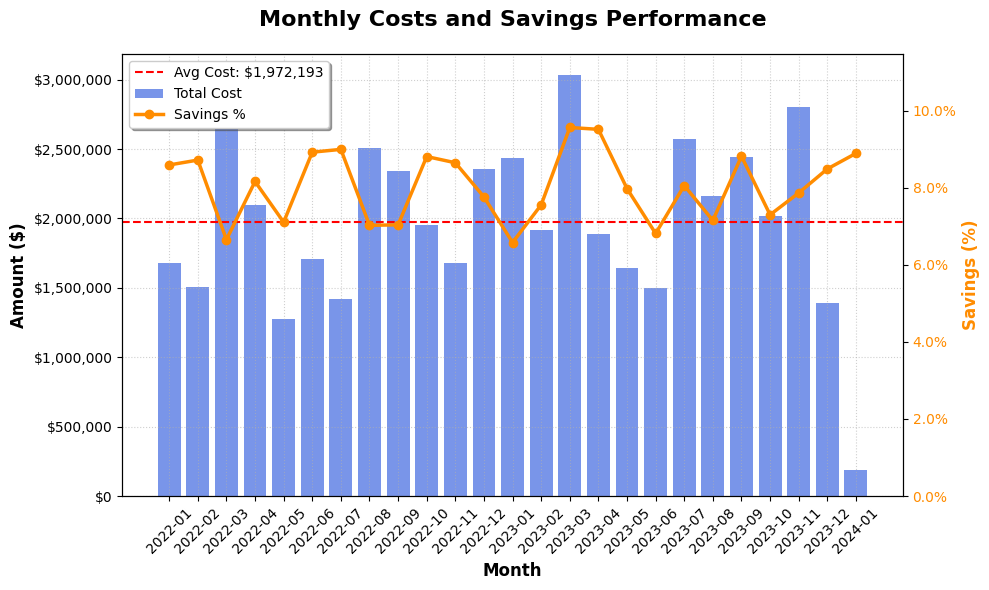

In [172]:
df['Total_Cost'] = df['Unit_Price'] * df['Quantity']
df['Discounted_Total_Cost'] = df['Negotiated_Price'] * df['Quantity']
df['Total_Saving_Amount'] = df['Total_Cost'] - df['Discounted_Total_Cost']
print(f'Total_Cost: $ {df['Total_Cost'].sum():,.2f}')
print(f'Total_Saving_Amount: $ {df['Total_Saving_Amount'].sum():,.2f}')

costs_ot = df.groupby(df['Order_Date'].dt.to_period('M'))[['Total_Cost', 'Total_Saving_Amount']].agg('sum')
costs_ot['Savings_%'] =  (costs_ot['Total_Saving_Amount']/ costs_ot['Total_Cost']) * 100
print(f'Mean Savings: {np.mean(costs_ot['Savings_%']):.2%}')

costs_ot.index = costs_ot.index.astype(str)

plt.style.use('seaborn-v0_8-muted')
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(costs_ot.index, costs_ot['Total_Cost'], color='royalblue', alpha=0.7, label='Total Cost')
ax1.set_xlabel('Month', fontsize=12, fontweight='bold')
ax1.set_ylabel('Amount ($)', fontsize=12, fontweight='bold')

ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax1.tick_params(axis='x', rotation=45)

avg_cost = costs_ot['Total_Cost'].mean()
ax1.axhline(avg_cost, linestyle='--', color='red', linewidth=1.5, label=f'Avg Cost: ${avg_cost:,.0f}')

ax2 = ax1.twinx()
ax2.plot(costs_ot.index, costs_ot['Savings_%'], color='darkorange', marker='o', linewidth=2.5, label='Savings %')
ax2.set_ylabel('Savings (%)', fontsize=12, fontweight='bold', color='darkorange')

ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_ylim(0, max(costs_ot['Savings_%']) * 1.2) # Dynamiczny margines góry
ax2.tick_params(axis='y', labelcolor='darkorange')

plt.title('Monthly Costs and Savings Performance', fontsize=16, fontweight='bold', pad=20)
ax1.grid(True, linestyle=':', alpha=0.6) # Subtelna siatka

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', frameon=True, shadow=True)

plt.tight_layout()
plt.show()


Costs by Vendor

,Total_Cost,Total_Saving_Amount,Savings_%
Supplier,,,
Beta_Supplies,10748606.79,889940.89,8.28
Alpha_Inc,8528632.74,688920.49,8.08
Epsilon_Group,10696136.24,844980.18,7.90
Delta_Logistics,10018216.96,781976.49,7.81
Gamma_Co,9313230.13,725308.42,7.79


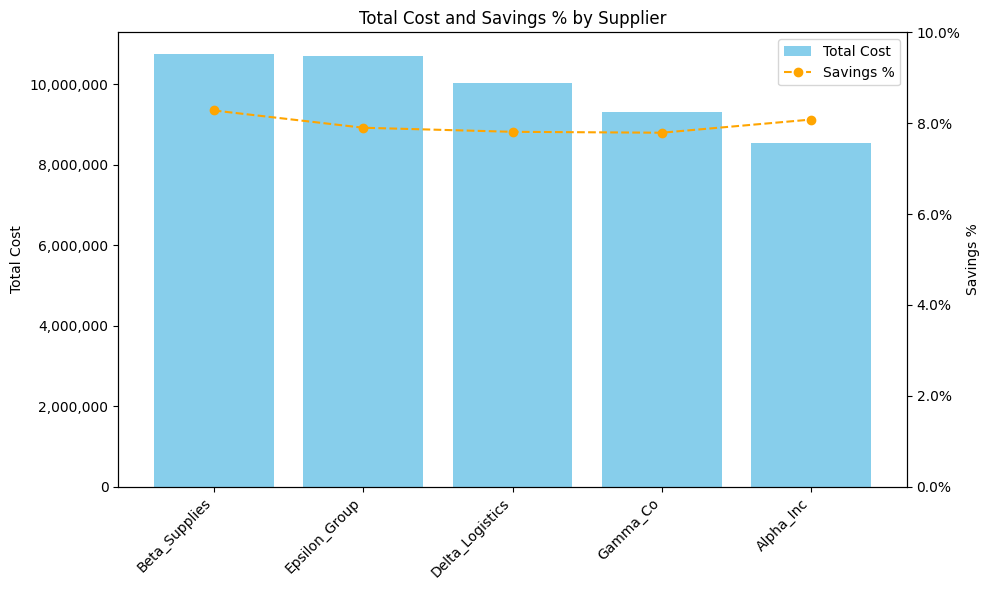

In [173]:
costs_vendor = df.groupby('Supplier')[['Total_Cost', 'Total_Saving_Amount']].agg('sum')
costs_vendor['Savings_%'] =  round(costs_vendor['Total_Saving_Amount']/ costs_vendor['Total_Cost'] * 100,2)

cv = costs_vendor.sort_values(by='Total_Cost', ascending=False)
x = np.arange(len(cv))

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(x, cv['Total_Cost'].to_numpy(), label='Total Cost', color='skyblue')
ax1.set_ylabel('Total Cost')
ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

ax2 = ax1.twinx()
ax2.plot(x, cv['Savings_%'].to_numpy(), linestyle='--', marker='o', color='orange', label='Savings %')
ax2.set_ylabel('Savings %')
ax2.set_ylim(0, 10) # Opcjonalnie: ustawienie sztywnej skali 0-100%
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))

ax1.set_xticks(x)
ax1.set_xticklabels(cv.index.astype(str), rotation=45, ha='right')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper right')

plt.title('Total Cost and Savings % by Supplier')
plt.tight_layout()

costs_vendor.sort_values('Savings_%', ascending=False)